In [1]:
# Uncomment the lines to install libraries if needed.
# !pip install --force --upgrade gen3 --ignore-installed certifi
# !pip install numpy
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn

In [2]:
%pip install seaborn

In [ ]:
%pip install drsclient 
%pip install fastavro
%pip install gen3dictionary
%pip install python-json-logger
%pip install pypfb

In [ ]:
%pip install gen3

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import seaborn as sns
import re
from pandas import DataFrame
import warnings

In [22]:
import gen3
from gen3.auth import Gen3Auth
from gen3.submission import Gen3Submission
from gen3.index import Gen3Index

In [23]:
import os# First, we need to know which program and project we want to download the structured data from.
# Programs and projects of interest can be found on commons.url/submission, or, in this notebook https://caninedc.org/submission.
# In this notebook, we select program "Canine" and project "NHGRI"
program = "Canine"
project = "NHGRI"

In [24]:
# Define the Gen3 API (URL of the Gen3 commons)
endpoint = "https://caninedc.org/"

# Download the credentials JSON under https://caninedc.org/identity and call the path to the JSON file.
creds = "canine_credentials.json"

# Authentication using the class "Gen3Auth", which generates access tokens.
auth = Gen3Auth(endpoint, creds)
sub = Gen3Submission(endpoint, auth)

home_directory = os.getcwd() # replace with a path if needed.

In [25]:
# First, we need to know which program and project we want to download the structured data from.
# Programs and projects of interest can be found on commons.url/submission, or, in this notebook https://caninedc.org/submission.
# In this notebook, we select program "Canine" and project "NHGRI"
program = "Canine"
project = "NHGRI"

In [26]:
subject_data = sub.export_node(program, project, "subject", "tsv", home_directory + "/subject.tsv")
sample_data = sub.export_node(program, project, "sample", "tsv", home_directory + "/sample.tsv")

<class 'requests.exceptions.ConnectionError'>: ('Connection aborted.', HTTPException("Failed to execute 'send' on 'XMLHttpRequest': Failed to load 'https://caninedc.org/user/credentials/cdis/access_token'."))

In [24]:
# Load the downloaded subject tsv file to the Pandas dataframe with regex delimiter '\t'.
subject = pd.read_csv("subject.tsv", sep='\t', header=0)

# As "subject" is now the dataframe, we can run Pandas functions on it by adding a ".function" 

# Return the first 5 rows of the dataframe "subject"
subject.head()

# Commands to show dataframe shape and info:
# 1. Return info of the dataframe using: $ subject.info
# 2. Return the format of the dataframe in (rows, columns) using: $ subject.shape

,type,id,project_id,submitter_id,breed,days_to_lost_to_followup,disease_type,index_date,lost_to_followup,primary_site,species,tissue_source_site_code,studies.id,studies.submitter_id
0,subject,05f90a4e-5fbd-11e9-8647-d663bd873d93,Canine-NHGRI,1a608300-5fc1-11e9-8647-d663bd873d93,Norwich Terrier,NaN,healthy,NaN,NaN,whole blood,Canis lupus familiaris,whole blood,4a175584-5fbb-11e9-8647-d663bd873d93,GSE90441
1,subject,05f9102a-5fbd-11e9-8647-d663bd873d93,Canine-NHGRI,1a60844a-5fc1-11e9-8647-d663bd873d93,Old English Sheepdog,NaN,healthy,NaN,NaN,whole blood,Canis lupus familiaris,whole blood,4a175584-5fbb-11e9-8647-d663bd873d93,GSE90441
2,subject,05f911b0-5fbd-11e9-8647-d663bd873d93,Canine-NHGRI,1a608580-5fc1-11e9-8647-d663bd873d93,Old English Sheepdog,NaN,healthy,NaN,NaN,whole blood,Canis lupus familiaris,whole blood,4a175584-5fbb-11e9-8647-d663bd873d93,GSE90441
3,subject,05f912fa-5fbd-11e9-8647-d663bd873d93,Canine-NHGRI,1a6086b6-5fc1-11e9-8647-d663bd873d93,Old English Sheepdog,NaN,healthy,NaN,NaN,whole blood,Canis lupus familiaris,whole blood,4a175584-5fbb-11e9-8647-d663bd873d93,GSE90441
4,subject,05f91426-5fbd-11e9-8647-d663bd873d93,Canine-NHGRI,1a6087f6-5fc1-11e9-8647-d663bd873d93,Old English Sheepdog,NaN,healthy,NaN,NaN,whole blood,Canis lupus familiaris,whole blood,4a175584-5fbb-11e9-8647-d663bd873d93,GSE90441


In [25]:
subject_clean = subject.dropna(axis = 1, how = 'all')
subject_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   type                     1090 non-null   object
 1   id                       1090 non-null   object
 2   project_id               1090 non-null   object
 3   submitter_id             1090 non-null   object
 4   breed                    1090 non-null   object
 5   disease_type             1090 non-null   object
 6   primary_site             1090 non-null   object
 7   species                  1090 non-null   object
 8   tissue_source_site_code  1090 non-null   object
 9   studies.id               1090 non-null   object
 10  studies.submitter_id     1090 non-null   object
dtypes: object(11)
memory usage: 46.9+ KB


In [26]:
# Return only one column from dataframe "subject". Here we show two options to do this.
# Option 1: call the name of the column in the dataframe
subject_clean['species']

0       Canis lupus familiaris
1       Canis lupus familiaris
2       Canis lupus familiaris
3       Canis lupus familiaris
4       Canis lupus familiaris
                 ...          
1085    Canis lupus familiaris
1086    Canis lupus familiaris
1087    Canis lupus familiaris
1088    Canis lupus familiaris
1089    Canis lupus familiaris
Name: species, Length: 1090, dtype: object

In [27]:
# Removing columns not necessary for data analysis with the function "drop"
subject_clean_slim = subject_clean.drop(columns=['type', 'id', 'project_id', 'studies.id', 'studies.submitter_id'])
subject_clean_slim.head()

,submitter_id,breed,disease_type,primary_site,species,tissue_source_site_code
0,1a608300-5fc1-11e9-8647-d663bd873d93,Norwich Terrier,healthy,whole blood,Canis lupus familiaris,whole blood
1,1a60844a-5fc1-11e9-8647-d663bd873d93,Old English Sheepdog,healthy,whole blood,Canis lupus familiaris,whole blood
2,1a608580-5fc1-11e9-8647-d663bd873d93,Old English Sheepdog,healthy,whole blood,Canis lupus familiaris,whole blood
3,1a6086b6-5fc1-11e9-8647-d663bd873d93,Old English Sheepdog,healthy,whole blood,Canis lupus familiaris,whole blood
4,1a6087f6-5fc1-11e9-8647-d663bd873d93,Old English Sheepdog,healthy,whole blood,Canis lupus familiaris,whole blood


In [28]:
# We can count the occurrences of different breeds using three options.
# Option 1: Use the function "value_counts"
subject_clean_slim_breeds = subject_clean_slim.breed.value_counts()
print(subject_clean_slim_breeds)

breed
Saluki                  29
Italian Greyhound       17
Saint Bernard           17
Standard Schnauzer      17
Great Pyrenees          13
                        ..
Cane Paratore            2
Levriero Meridionale     2
Dingo                    1
Unknown                  1
Norwegian Elkhound       1
Name: count, Length: 132, dtype: int64


In [29]:
# Option 2: Use the function "groupby" and let Pandas show the counts in ascending size order using "sort_values": 
subject_clean_slim.groupby('breed').size().sort_values(ascending=False)

breed
Saluki                                 29
Italian Greyhound                      17
Standard Schnauzer                     17
Saint Bernard                          17
Great Pyrenees                         13
                                       ..
Golden Jackal                           2
American Staffordshire Bull Terrier     2
Dingo                                   1
Norwegian Elkhound                      1
Unknown                                 1
Length: 132, dtype: int64

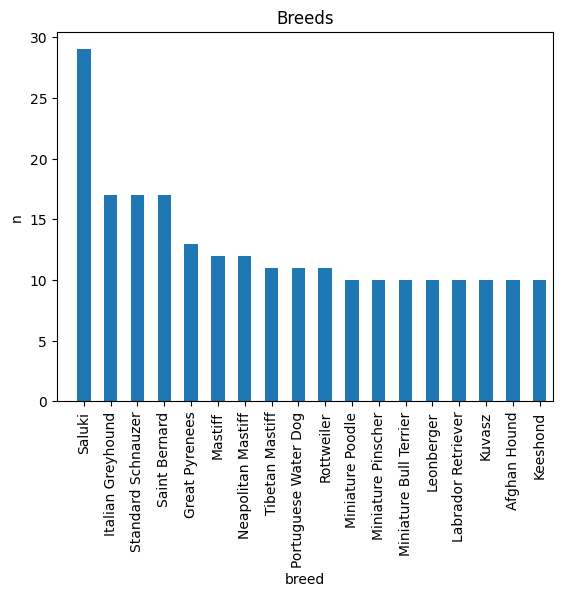

In [30]:
# We can directly plot the top entries using matplotlib.pyplot as plt (defined in the beginning)
subject_clean_slim.groupby('breed').size().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('n')
plt.title('Breeds')
plt.xlim(-1, 17.5) # setting the limits to the first 18 entries (instead of the full 132)
plt.show()

In [31]:
# Option 3: We can also show the top entries with the function pivot_table and save it as a new file 
countsbreed=subject_clean_slim.pivot_table(index=['breed'], aggfunc='size')
print(countsbreed)
countsbreed.shape

# Save the file to csv
countsbreed.to_csv('countsbreed.csv')

# Loading the saved file
counts_breed = pd.read_csv("countsbreed.csv", header=0)

# Renaming the column names with the function "columns" 
counts_breed.columns = ['breed', 'counts']
counts_breed.head(10) # shows the first 10 rows

breed
Afghan Hound                   10
Airedale Terrier                3
Akita                          10
Alaskan Malamute               10
American Cocker Spaniel        10
                               ..
Whippet                        10
Wirehaired Pointing Griffon     6
Wolf                            7
Xigou                           5
Yorkshire Terrier              10
Length: 132, dtype: int64


,breed,counts
0,Afghan Hound,10
1,Airedale Terrier,3
2,Akita,10
3,Alaskan Malamute,10
4,American Cocker Spaniel,10
5,American Hairless Terrier,10
6,American Staffordshire Bull Terrier,2
7,Anatolian Shepherd,6
8,Australian Cattle Dog,2
9,Australian Kelpie,2


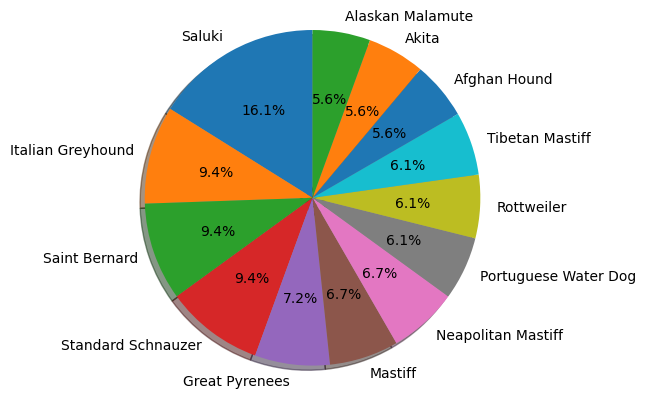

In [32]:
# Create pie chart of breeds showing only top 13 entries
top13 = counts_breed[counts_breed.counts > 9].nlargest(13, 'counts') # top 13 entries with counts > 9
data = top13['counts']
categories = top13["breed"]

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=categories, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

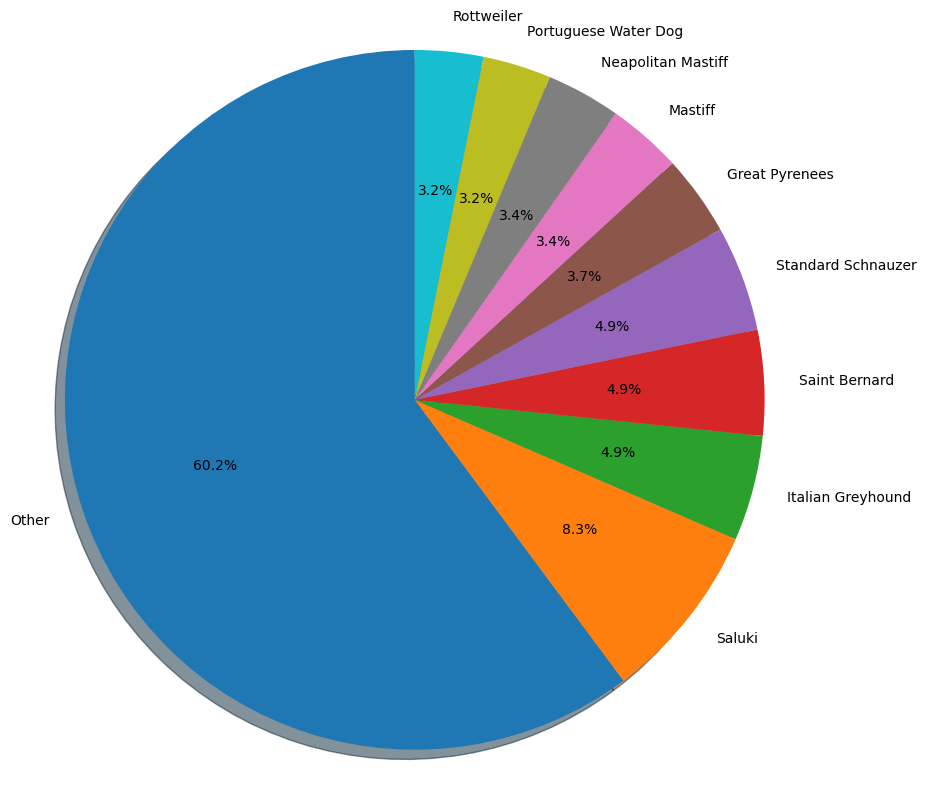

In [33]:
# We want to show the breeds that have above 9 counts and store all other breeds as "Other"
# First, we set limits for the counts and separate into two bins (those below 9 counts and those above).
# The first row keeps the count above 9 as the original "breed" and change the counts below 9 to "Other"
counts_breed["new_breed"] = np.where(counts_breed["counts"] >9, counts_breed['breed'], 'Other')

# Using the groupby function from before, we can again count the amount of entries of each breed
count_table = counts_breed.groupby('new_breed').sum() # count_table has now only one column
count_table = count_table.reset_index() # this command resets the index of the table

# Return a pie chart of the results
top14 = count_table[count_table.counts > 9].nlargest(10, 'counts') # show only the top 10 and others
data = top14["counts"]
categories = top14["new_breed"]
fig1, ax1 = plt.subplots()
ax1.pie(data, labels=categories, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig1.set_size_inches(10, 10) # Adjust figure size 
mpl.rcParams['font.size'] = 11.5 # Adjust font size


plt.show()

In [34]:
# Save the figure above
fig1.savefig('plot.png')